In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
# Siginificant Wave Height and Peak Period
H_s = 4        #meters
T_p = 5        #seconds
f_p = 1/T_p    #frequency

g = 9.81  # Gravity acceleration
alpha = 0.0081
gamma = 3.3
sigma_1 = 0.07
sigma_2 = 0.09


waves = np.arange(1, 7)

# Generate frequency array
f = np.linspace(0.1, 0.6, 100000)  # Avoid f = 0 to prevent division errors
df = f[1] - f[0]

In [3]:
def sigma(f, f_p, sigma_1, sigma_2):
    return np.where(f <= f_p, sigma_1, sigma_2)

# Energy density function
def E(f, f_p, g, alpha, gamma, sigma_1, sigma_2):
    term_1 = alpha * (g**2) * ((2*np.pi)**(-4)) * (f**(-5)) * np.exp((-5/4) * ((f/f_p)**(-4)))
    sigma_vals = sigma(f, f_p, sigma_1, sigma_2)  # Vectorized sigma function
    term_2 = gamma ** (np.exp((-1/2) * (((f - f_p) / (sigma_vals * f_p))**2)))
    return term_1 * term_2

# Compute energy spectrum
E_values = E(f, f_p, g, alpha, gamma, sigma_1, sigma_2)
sigma_f = np.sqrt(E_values *df)

<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lucwi\AppData\Local\Temp\ipykernel_16964\2812535863.py:27: SyntaxWarning: invalid escape sequence '\m'
  axes.set_ylabel('Variance [$\mathit{m}^2$/Hz]')


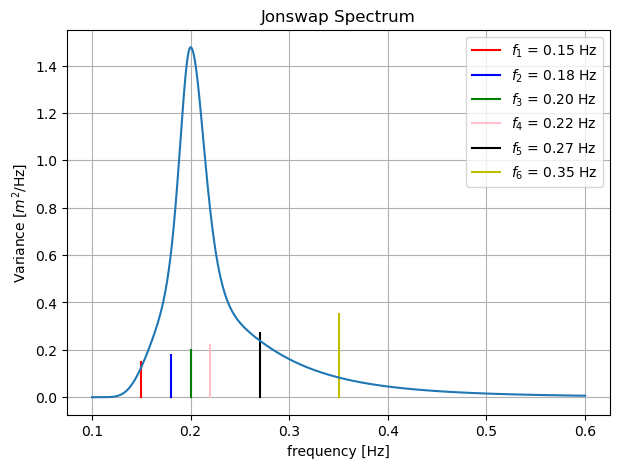

In [4]:
f_15 = E(0.15, f_p, g, alpha, gamma, sigma_1, sigma_2)
f_18 = E(0.18, f_p, g, alpha, gamma, sigma_1, sigma_2)
f_20 = E(0.20, f_p, g, alpha, gamma, sigma_1, sigma_2)
f_22 = E(0.22, f_p, g, alpha, gamma, sigma_1, sigma_2)
f_27 = E(0.27, f_p, g, alpha, gamma, sigma_1, sigma_2)
f_35 = E(0.35, f_p, g, alpha, gamma, sigma_1, sigma_2)

f_15 = 0.15
f_18 = 0.18
f_20 = 0.20
f_22 = 0.22
f_27 = 0.27
f_35 = 0.35


fig, axes = plt.subplots(1, 1, figsize=(7, 5))

axes.plot([0.15, 0.15], [0, f_15], 'r', label=f'$f_{waves[0]}$ = 0.15 Hz')
axes.plot([0.18, 0.18], [0, f_18], 'b', label=f'$f_{waves[1]}$ = 0.18 Hz')
axes.plot([0.20, 0.20], [0, f_20], 'g', label=f'$f_{waves[2]}$ = 0.20 Hz')
axes.plot([0.22, 0.22], [0, f_22], 'pink', label=f'$f_{waves[3]}$ = 0.22 Hz')
axes.plot([0.27, 0.27], [0, f_27], 'k', label=f'$f_{waves[4]}$ = 0.27 Hz')
axes.plot([0.35, 0.35], [0, f_35], 'y', label=f'$f_{waves[5]}$ = 0.35 Hz')
axes.plot(f, E_values)

axes.set_xlabel('frequency [Hz]')
axes.set_ylabel('Variance [$\mathit{m}^2$/Hz]')
axes.grid()
axes.legend()
axes.set_title('Jonswap Spectrum');

# plt.savefig('Jonswap.png', dpi=300)

In [5]:
seed = 42
np.random.seed(seed)
uniform_values = np.random.uniform(0, 2*np.pi, 6)

rayleigh_values = np.random.rayleigh()

C:\Users\lucwi\AppData\Local\Temp\ipykernel_16964\2239894848.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab10", 6)  # Get 6 distinct colors from the tab10 colormap


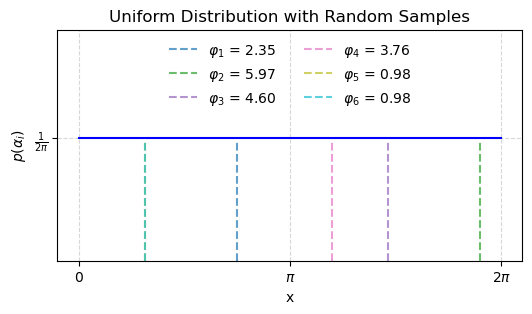

In [6]:
# Set range for uniform distribution
a, b = 0, 2*np.pi  

# Generate x values
x = np.linspace(a, b, 1000)
y = np.full_like(x, 1/(2*np.pi))  # Constant height = 1/(2π)

# Draw 6 random values and round them to 2 decimal places
uniform_values1 = [f"{val:.2f}" for val in uniform_values]  # Format values

# Get distinct colors from colormap
colors = cm.get_cmap("tab10", 6)  # Get 6 distinct colors from the tab10 colormap

# Create figure
fig, ax = plt.subplots(figsize=(6, 3))

# Plot the uniform distribution
ax.plot(x, y, color='b')

# Add vertical lines at sampled values with unique colors
for i, value in enumerate(uniform_values):
    ax.axvline(value, color=colors(i), linestyle='--', alpha=0.7, label=f"$\\varphi_{waves[i]}$ = {uniform_values1[i]}", ymax=.52)

# Set x-axis ticks at 0, π, and 2π
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(["0", r"$\pi$", r"$2\pi$"])  # LaTeX formatted ticks

# Set y-axis ticks with the correct height (1/2π)
ax.set_yticks([1/(2*np.pi)])
ax.set_yticklabels([r"$\frac{1}{2\pi}$"])  # LaTeX formatted fraction
ax.set_ylim(0, 0.3)
# Labels and title
ax.set_xlabel("x")
ax.set_ylabel(r"$p(\alpha_i)$")  # Correctly formatted alpha
ax.set_title("Uniform Distribution with Random Samples")

# Add unique legend entries
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

# Grid
ax.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

# fig.savefig('Random phase', dpi=300)


Text(0, 0.5, '$p(a_6)$')

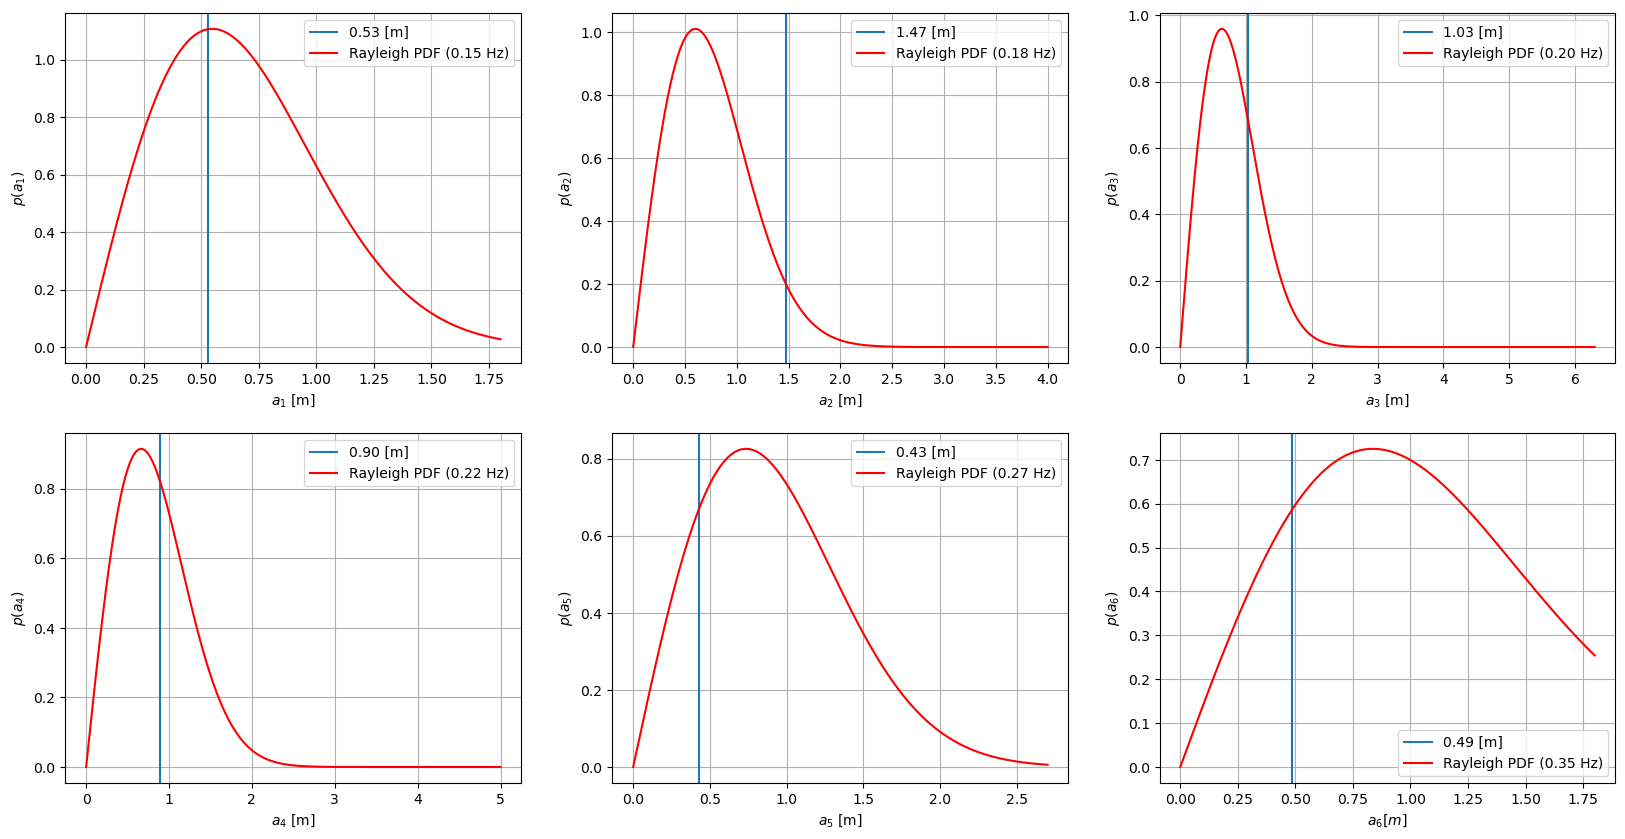

In [7]:
seed = 42
np.random.seed(seed)

A_15 = np.sqrt(2 * f_15) * np.random.rayleigh(scale=1.0)
A_18 = np.sqrt(2 * f_18) * np.random.rayleigh(scale=1.0)
A_20 = np.sqrt(2 * f_20) * np.random.rayleigh(scale=1.0)
A_22 = np.sqrt(2 * f_22) * np.random.rayleigh(scale=1.0)
A_27 = np.sqrt(2 * f_27) * np.random.rayleigh(scale=1.0)
A_35 = np.sqrt(2 * f_35) * np.random.rayleigh(scale=1.0)

sigma_15 = np.sqrt(2 * f_15)
sigma_18 = np.sqrt(2 * f_18)
sigma_20 = np.sqrt(2 * f_20)
sigma_22 = np.sqrt(2 * f_22)
sigma_27 = np.sqrt(2 * f_27)
sigma_35 = np.sqrt(2 * f_35)


fig, axes = plt.subplots(2, 3 , figsize=(20, 10))

x = np.linspace(0, 1.8, 1000)
pdf = (x / sigma_15**2) * np.exp(-x**2 / (2 * sigma_15**2))
axes[0, 0].axvline(A_15, label=f'{A_15:.2f} [m]')
axes[0, 0].plot(x, pdf, 'r-', label="Rayleigh PDF (0.15 Hz)")
axes[0, 0].grid()
axes[0, 0].legend()
axes[0, 0].set_xlabel(r"$a_1$ [m]")
axes[0, 0].set_ylabel(r"$p(a_1)$")

x = np.linspace(0, 4, 1000)
pdf = (x / sigma_18**2) * np.exp(-x**2 / (2 * sigma_18**2))
axes[0, 1].axvline(A_18, label=f'{A_18:.2f} [m]')
axes[0, 1].plot(x, pdf, 'r-', label="Rayleigh PDF (0.18 Hz)")
axes[0, 1].grid()
axes[0, 1].legend()
axes[0, 1].set_xlabel(r"$a_2$ [m]")
axes[0, 1].set_ylabel(r"$p(a_2)$")

x = np.linspace(0, 6.3, 1000)
pdf = (x / sigma_20**2) * np.exp(-x**2 / (2 * sigma_20**2))
axes[0, 2].axvline(A_20, label=f'{A_20:.2f} [m]')
axes[0, 2].plot(x, pdf, 'r-', label="Rayleigh PDF (0.20 Hz)")
axes[0, 2].grid()
axes[0, 2].legend()
axes[0, 2].set_xlabel(r"$a_3$ [m]")
axes[0, 2].set_ylabel(r"$p(a_3)$")

x = np.linspace(0, 5, 1000)
pdf = (x / sigma_22**2) * np.exp(-x**2 / (2 * sigma_22**2))
axes[1, 0].axvline(A_22, label=f'{A_22:.2f} [m]')
axes[1, 0].plot(x, pdf, 'r-', label="Rayleigh PDF (0.22 Hz)")
axes[1, 0].grid()
axes[1, 0].legend()
axes[1, 0].set_xlabel(r"$a_4$ [m]")
axes[1, 0].set_ylabel(r"$p(a_4)$")

x = np.linspace(0, 2.7, 1000)
pdf = (x / sigma_27**2) * np.exp(-x**2 / (2 * sigma_27**2))
axes[1, 1].axvline(A_27, label=f'{A_27:.2f} [m]')
axes[1, 1].plot(x, pdf, 'r-', label="Rayleigh PDF (0.27 Hz)")
axes[1, 1].grid()
axes[1, 1].legend()
axes[1, 1].set_xlabel(r"$a_5$ [m]")
axes[1, 1].set_ylabel(r"$p(a_5)$")

x = np.linspace(0, 1.8, 1000)
pdf = (x / sigma_35**2) * np.exp(-x**2 / (2 * sigma_35**2))
axes[1, 2].axvline(A_35, label=f'{A_35:.2f} [m]')
axes[1, 2].plot(x, pdf, 'r-', label="Rayleigh PDF (0.35 Hz)")
axes[1, 2].grid()
axes[1, 2].legend()
axes[1, 2].set_xlabel(r"$a_6 [m]$")
axes[1, 2].set_ylabel(r"$p(a_6)$")

# fig.savefig('Rayleigh.png', dpi=300)

In [8]:
print(uniform_values1)
print(1/min(f_15, f_18, f_20, f_22, f_27, f_35))

['2.35', '5.97', '4.60', '3.76', '0.98', '0.98']
6.666666666666667


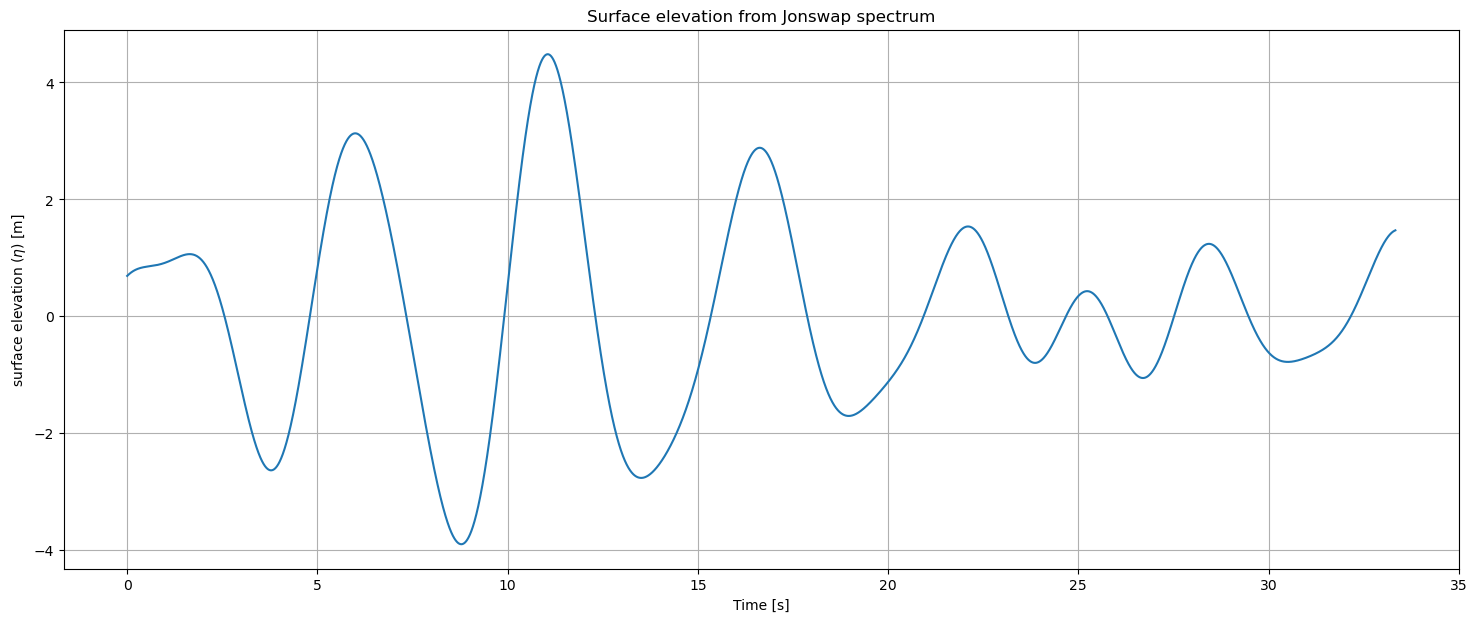

In [9]:
period = 5 * (1/min(f_15, f_18, f_20, f_22, f_27, f_35))
t = np.linspace(0, period ,10000)

wave_15 = A_15 * np.cos(2*np.pi*f_15*t + uniform_values[0])
wave_18 = A_18 * np.cos(2*np.pi*f_18*t + uniform_values[1])
wave_20 = A_20 * np.cos(2*np.pi*f_20*t + uniform_values[2])
wave_22 = A_22 * np.cos(2*np.pi*f_22*t + uniform_values[3])
wave_27 = A_27 * np.cos(2*np.pi*f_27*t + uniform_values[4])
wave_35 = A_35 * np.cos(2*np.pi*f_35*t + uniform_values[5])

wave_train = wave_15 + wave_18 + wave_20 + wave_22 + wave_27 +wave_35

fig, ax = plt.subplots(figsize=(18, 7))

# Plot the uniform distribution
ax.plot(t, wave_train)
ax.set_ylabel(r"surface elevation $(\eta)$ [m]")
ax.set_xlabel('Time [s]')
ax.set_title('Surface elevation from Jonswap spectrum')
ax.grid()

# fig.savefig('Spectrum', dpi=400)

### Wave Train

In [10]:
t = np.linspace(0, 60 ,60000)
frequencies = [round(f_15, 2), round(f_18, 2), round(f_20, 2), round(f_22, 2), round(f_27, 2), round(f_35, 2)]
phases = [round(val,2) for val in uniform_values]
amplitudes = [round(A_15, 4), round(A_18, 4), round(A_20, 4), round(A_22, 4), round(A_27, 4), round(A_35, 4)]
omegas = [np.round(2*np.pi*f, 4) for f in frequencies]
T = [(round((2*np.pi)/omega)) for omega in omegas]
T1 = [round(1/f, 2) for f in [f_15, f_18, f_20, f_22, f_27, f_35]]


amplitudes = np.random.rayleigh(scale=sigma_f)
phases = 2 * np.pi * np.random.rand(len(f))


wave_train = wave_15 + wave_18 + wave_20 + wave_22 + wave_27 + wave_35

t = np.linspace(0, 60, 1000)  # 60 seconds, 1000 time steps
eta = np.zeros_like(t)

for i in range(len(f)):
    eta += amplitudes[i] * np.cos(2 * np.pi * f[i] * t + phases[i])


data = np.column_stack((t, eta))
np.savetxt('wavetrain.txt', data, header='t, eta', comments='', delimiter=',')

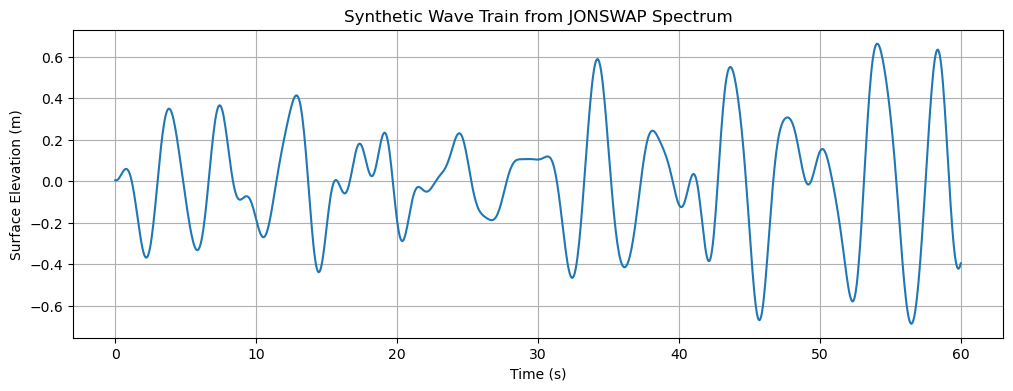

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(t, eta)
plt.xlabel("Time (s)")
plt.ylabel("Surface Elevation (m)")
plt.title("Synthetic Wave Train from JONSWAP Spectrum")
plt.grid(True)
plt.show()


In [12]:
print(f'frequencies: {frequencies}')
print(f"omega's: {omegas}")
print(f'phases: {phases}')
print(f'amplitudes: {amplitudes}')
print(f'T: {T}')
print(f'T1: {T1}')

frequencies: [0.15, 0.18, 0.2, 0.22, 0.27, 0.35]
omega's: [np.float64(0.9425), np.float64(1.131), np.float64(1.2566), np.float64(1.3823), np.float64(1.6965), np.float64(2.1991)]
phases: [5.24664603 4.94420356 2.14063363 ... 2.80755983 1.27599775 1.74418274]
amplitudes: [2.48370754e-07 1.44262780e-06 9.77044830e-07 ... 2.07486446e-04
 1.69627677e-04 2.60659040e-04]
T: [7, 6, 5, 5, 4, 3]
T1: [6.67, 5.56, 5.0, 4.55, 3.7, 2.86]


In [13]:
wave = 4



actual = wave-1

L =10
for i in range(100):
    l = ((9.81*(T[actual]**2))/(2*np.pi))*np.tanh((2*np.pi*40)/L)
    if abs(l - L) < 0.01:
        L = l
        break
    else:
        L = l

H_D = (amplitudes[actual]) / 8.5
scnd = (np.pi * 8.5) / L

print(f'H: {round(amplitudes[actual], 2)} m')
print(f'L: {round(L, 1)} m')
print(f'H/D: {round(H_D, 2)}')
print(f'piD/L: {round(scnd, 2)}')
# k = [round(omega/c, 4) for omega in omegas]

H: 0.0 m
L: 39.0 m
H/D: 0.0
piD/L: 0.68
